<IPython.core.display.Javascript object>


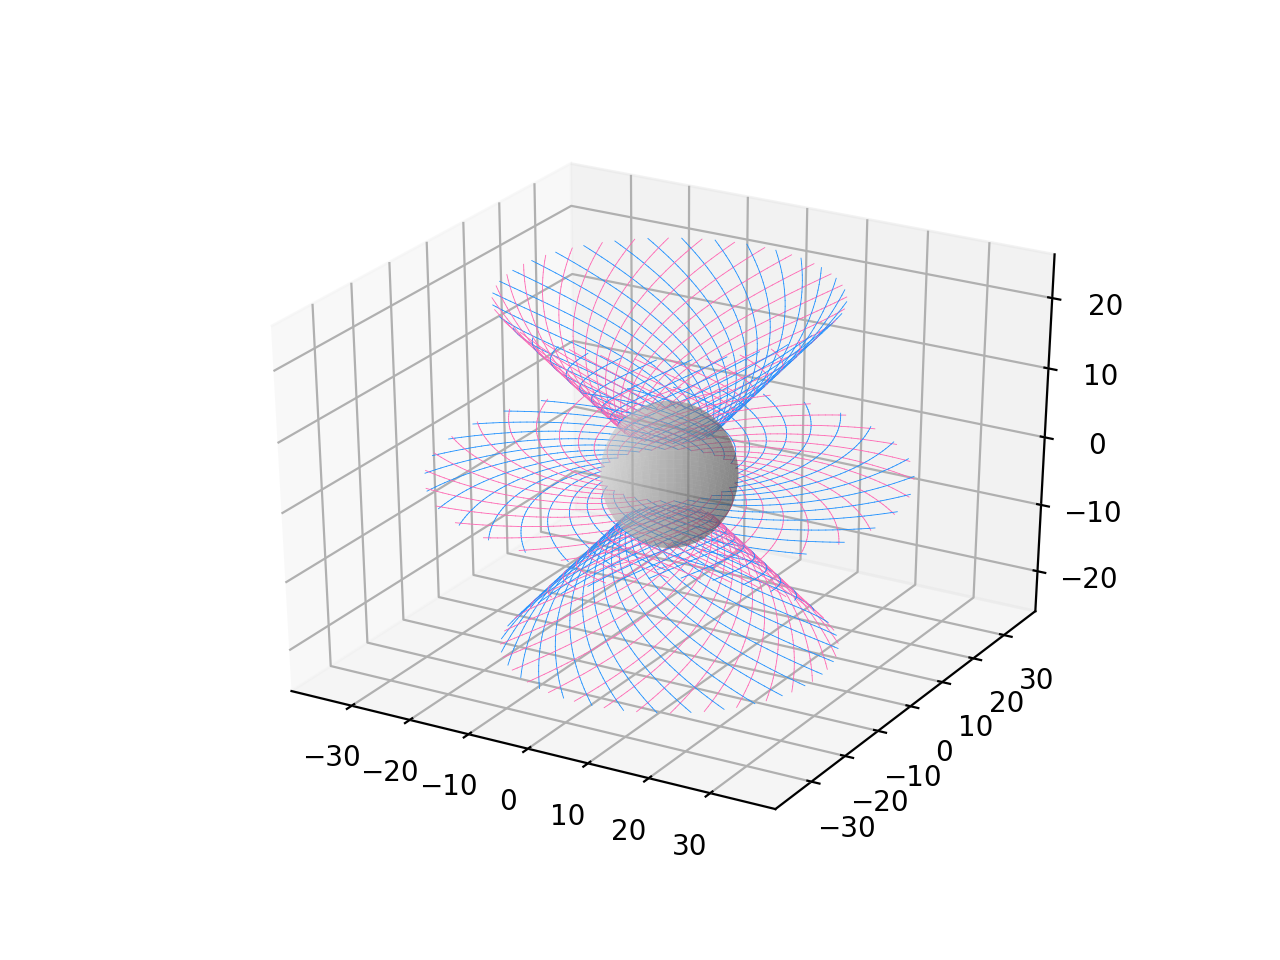

In [186]:
from math import pi
import numpy as np
import xarray as xr
# %matplotlib inline
%matplotlib notebook
import math 
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import axes3d, Axes3D

# Domain
r1, r2, step = 10, 35, 1 # Radius of Bowls 1 & 2, Step in absolute value
point1 = 16
th_s = pi / point1       # Radial distribution of starting points on Bowl 1
point2 = 4               # starting points on Bowl 1
phi_s = pi / point2      # Azimutal distribution of starting points on Bowl 1
hstep = 0                # For exploded view
# Loads
m = np.array([
    [0,1,0],
    [1,0,0],
    [0,0,0]
])                   # Strain tensor for this coordinate sys. convention

#Calculate eigenvectors and eigenvalues
d, v = LA.eig(m)
v = v[:, d != 0]
d = d[d != 0]
lambda_M = d[0]
lambda_m = d[-1]
pi_M = v[:, 0] * np.sign(v[0, 0])
pi_m = v[:, -1] * np.sign(v[0, -1])

def sph2cart(azimuth,elevation,r):
        x = r * np.cos(elevation) * np.cos(azimuth)
        y = r * np.cos(elevation) * np.sin(azimuth)
        z = r * np.sin(elevation)
        return x, y, z
    
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = r1 * np.outer(np.cos(u), np.sin(v))
y = r1 * np.outer(np.sin(u), np.sin(v))
z = r1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color=(0.8, 0.8, 0.8), alpha=0.4)

# Generation of the Form
for i in np.arange(1,point2):
    phi = pi * i / point2
    starting_points = []
    for ii in 1 + np.arange(point1 * 2):
        th = 2 * pi * ii / (point1 * 2)   
        node = np.array([r1, th, phi])
        starting_points.append(node)
    next_starting_points = []    
    height = (1 - phi / (pi / 2)) * hstep 
    
    # First iteration
    for r, a, angle in starting_points:
        x, y, z = sph2cart(a, pi/2 - angle, r)
        for (pi_r, pi_a, pi_angle), color in (pi_M, 'dodgerblue'), (pi_m, 'hotpink'):
            mr, ma, mangle = m_sphere = [r + step * pi_r, 
                                         a + step * pi_a/(r * math.sin(angle)), 
                                         angle + step * pi_angle/r] 
            mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
            z, mz = z + height, mz + height  
            ax.plot([x, mx],
                    [y, my],
                    zs = [z, mz], 
                    color = color, 
                    linewidth = 0.3)
            next_starting_points.append(m_sphere)
            
    # Next iterations
    while max(np.array(next_starting_points)[:,0]) < r2:
        starting_points = next_starting_points
        next_starting_points = []
        for r, a, angle in starting_points:
            x, y, z = sph2cart(a, pi/2 - angle, r)
            time = len(next_starting_points) + 1
            pi_select, color = (pi_M, 'dodgerblue') if time % 2 == 1 else (pi_m, 'hotpink')

            [pi_r, pi_a, pi_angle] = pi_select
            mr, ma, mangle = m_sphere = [r + step * pi_r, 
                                         a + step * pi_a/(r * np.sin(angle)), 
                                         angle + step * pi_angle/r] 
            mx, my, mz = sph2cart(ma, pi/2 - mangle, mr)
            z, mz = z + height, mz + height  
            ax.plot(
                [x, mx],
                [y, my],
                zs = [z, mz], 
                color = color, 
                linewidth = 0.3
            )
            next_starting_points.append(m_sphere)
plt.show()

<IPython.core.display.Javascript object>


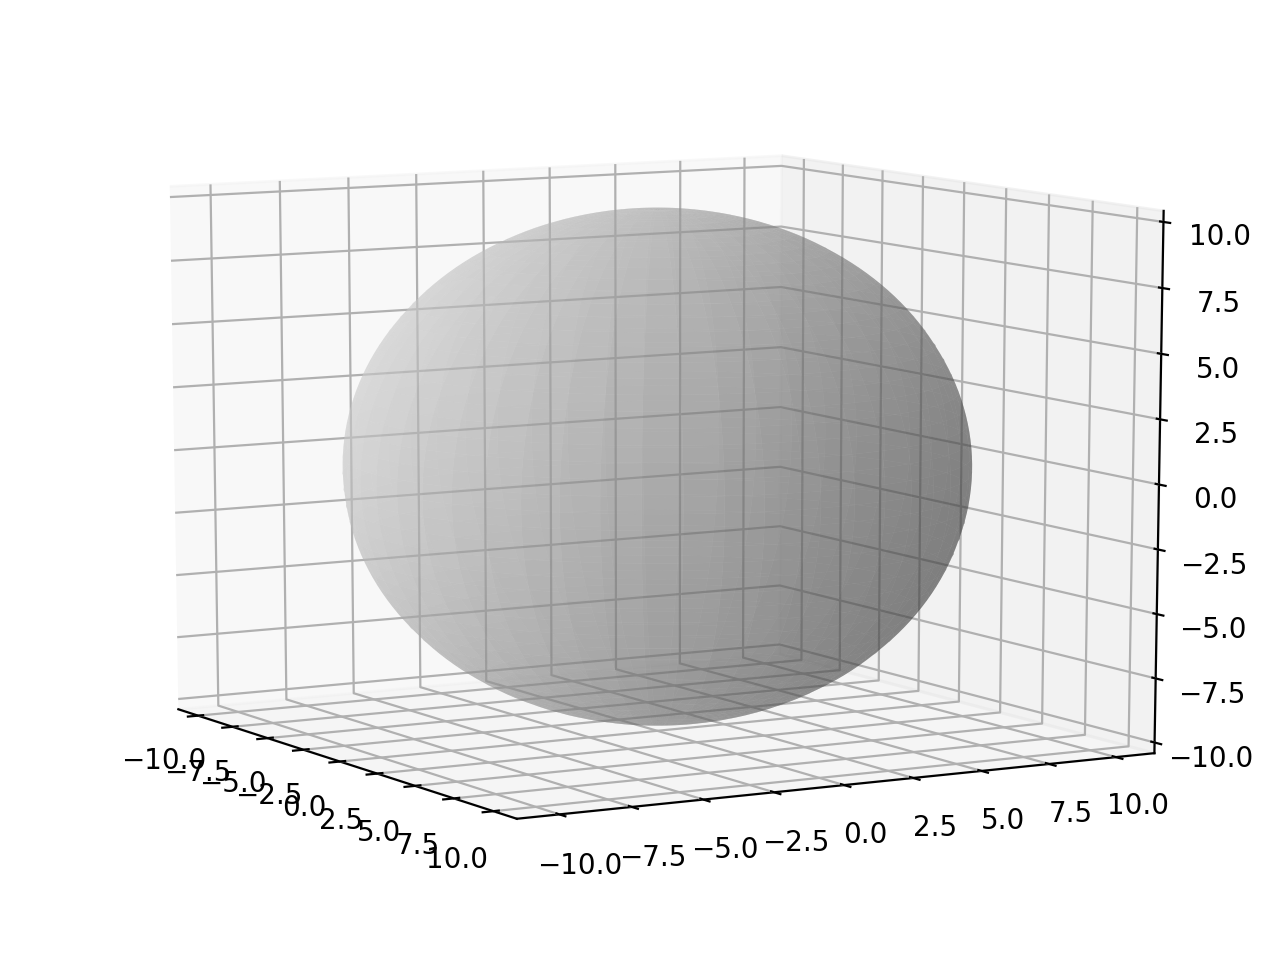

In [185]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = r1 * np.outer(np.cos(u), np.sin(v))
y = r1 * np.outer(np.sin(u), np.sin(v))
z = r1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color=(0.8, 0.8, 0.8), alpha=0.4)

ax = Axes3D(fig)
ax.plot_surface(x, y, z, color=(0.8, 0.8, 0.8), alpha=0.4)
for ii in np.arange(0,360,30):
    ax.view_init(elev=10., azim=ii)
    fig.savefig("movie%d.png" % ii)